# Chapter 4 Training Models

* Most of the topics discussed in this chapter will be essential in understanding, building, and training neural networks.

** Start by looking at the Linear Regression model**
1. using a direct 'closed-form' equation.
2. using Gradient Descent.

** Then will look at Polynomial Regression **
1. how to dectect whether is overfitting the training data.
2. use regularization techniques.

## Linear Regression

life_satisfaction = theta0 + theta1*GDP_per_capita.

### The Normal Equation

Theta = (X'X)^-1X'y

In [4]:
import numpy as np

X = 2*np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)

In [5]:
X_b = np.c_[np.ones((100,1)), X] #add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[ 3.85347264],
       [ 3.07750707]])

In [6]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[  3.85347264],
       [ 10.00848677]])

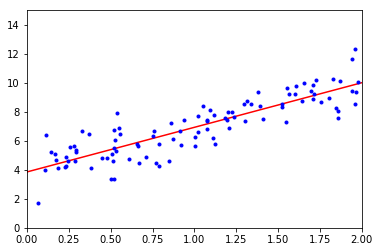

In [9]:
import matplotlib.pyplot as plt
plt.plot(X_new, y_predict, 'r-')
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])
plt.show()

In [10]:
#The equivalent code using sklearn

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([ 3.85347264]), array([[ 3.07750707]]))

In [11]:
lin_reg.predict(X_new)

array([[  3.85347264],
       [ 10.00848677]])

### Computational Complexity

* The computational complexity of inverting a matrix is about O(n^2.4) to O(n^3)

### Gradient Descent

* random initialization
* learning rate

### Batch Gradient Descent

* use the whole batch of training data at every step.

In [12]:
eta = 0.1 #learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta*gradients

theta

array([[ 3.85347264],
       [ 3.07750707]])

### Stochasitic Gradient Descent

* The main problem with Batch Gradient Descent is the fact that it uses the whole training set.

* SGD just picks a random instance in the training set at every step and computes the gradients based only on that single instance.

* The cost function will bounce up and down, decreasing only on average.

* The SGD has a better chance of finding the global minimum than GD

* The SGD will never settle at the minimum.

* One solution is to gradually reduce the learning rate.(simulated annealing)

* The function that determines the learning rata at each iteration is called learning schedule.

In [13]:
n_epochs = 50
t0, t1 = 5,50 #learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta*gradients
theta

array([[ 3.82940355],
       [ 3.06926143]])

In [14]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([ 3.83900811]), array([ 3.05766326]))

### Mini-batch Gradient Descent

* computes the gradients on small random sets of instances called mini-batches.
* The main advantage of Mini-batch GD over SGD is that we can get a performance boost from hardware optimization of matrix operations, especially when using GPUs.
* Mini-batch GD will end up walking around a bit closer to the minimum than SGD.

## Polynomial Regression

** add powers of each feature as new features, then train a linear model on this extended set of features **

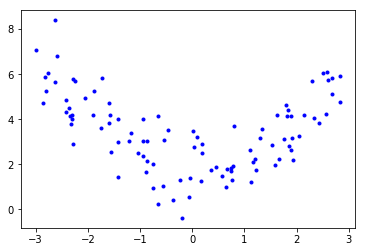

In [15]:
m = 100
X = 6 * np.random.rand(m,1) -3
y = 0.5 * X**2 + 2 + np.random.randn(m, 1)

plt.plot(X, y, 'b.')
plt.show()

In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias = False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-1.41953026])

In [17]:
X_poly[0]

array([-1.41953026,  2.01506616])

In [18]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([ 1.89060957]), array([[-0.10848415,  0.51338934]]))

In [19]:
y_predict = lin_reg.predict(X_poly)

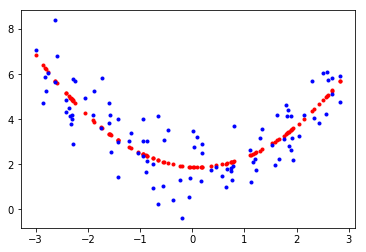

In [20]:
plt.plot(X, y_predict,'r.' )
plt.plot(X, y, 'b.')
plt.show()

** When there are multiple features, Polynomial Regression is capable of finding realationships between features.**


### Learning Curves

* These are plots of the model's performance on the training set and the validation set as a  function of the training set size.

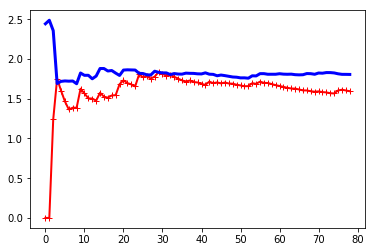

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, vals_errors=[], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        vals_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(vals_errors), 'b-', linewidth=3, label='val')

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.show()

* These learning curves are typical of an underfitting model. Both curves have reached a plateau; they are close and fairly high.
* If model is underfitting the training data, adding more training examples will not help. we need to use a more complex model or come up with better features.

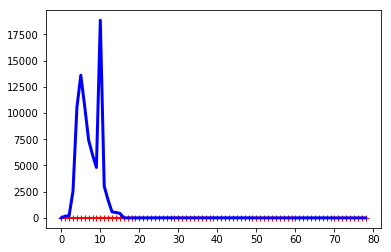

In [22]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline((('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
                                 ('sgd_reg', LinearRegression()),))
plot_learning_curves(polynomial_regression, X, y)
plt.show()

## Regularized Linear Models


### Ridge Regression

** a regularization term equal to alpha(theta)'(theta) is added to the cost function. **
* This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible.
* we evaluate the model's performance using the unregularized performance measure.
* It is important to scale the data before performing Ridge Regression.


In [23]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[ 3.1509948]])

In [24]:
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([ 2.30144316])

### Lasso Regression

* it uses the l1 norm of the weight vector instead of half the square of the l2 norm.
* Lasso Regression tends to completely eliminate the weights of the least important features.

In [25]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])


array([ 3.20308445])

### Elastic Net

* The regularization term is a simple mix of both Ridge and Lasso's regularization terms.

In [26]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([ 3.18080423])

### Early Stopping

* To stop training as soos as the validation error reaches a minimum.

In [27]:
from sklearn.base import clone
sgd_re = SGDRegressor(n_iter=1, warm_start=True, penalty=None,
                     learning_rate='constant', eta0=0.0005)
minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

NameError: name 'X_train_poly_scaled' is not defined

## Logistic Regression

** It is commonly used to estimate the probability that an instance belongs to a particular class.**

### Estimating Probabilities

* p=sig(theta'X)

### Training and Cost Function

* J(theta)

### Decision Boundaries

* Use Iris data as an example. build a classifier to detect the Iris-Virginica type based only on the petal width feature.

In [28]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [29]:
X = iris["data"][:,3:]
y = (iris["target"] == 2).astype(np.int)

In [32]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

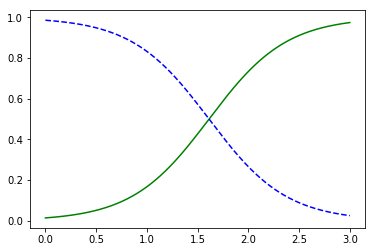

In [34]:
X_new = np.linspace(0, 3, 1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1], 'g-', label='Iris-Virginica')
plt.plot(X_new, y_proba[:,0], 'b--', label='Not Iris-Virginica')
plt.show()

* The decision boundary is around 1.6cm where both probabilities are equal to 50%.

In [36]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

## Softmax Regression

* The logistic regression model can be generalized to support multiple classes directly, without having to train and combine multiple binary classifiers. This is called **_Sotfmax Regression_,** or **_Multinamial Logistic Regression_**

* Softmax score for class k  S_k(x) = Theta_k'.X

* Note that each class has its own dedicated parameter vector theta_k

** Softmax function** p_k = exp(S_k(x))/(sum(exp(s_j(x)))